# The automatic derivation of the formula under different social norms

## 1. Reward Matrix

在捐赠者博弈中，设$do$ 可能以$b$ 为代价捐赠，对手获得收益$c$，也可以不捐赠，则代价为$0$，对手收益为$0$。$re$ 可能以 $\beta$ 为代价回赠，对手获得收益$\gamma$，也可以不回赠，则代价为$0$，对手收益为$0$。

In the donor game, suppose $do$ may donate at a cost of $b$, and the opponent receives a profit of $c$, or it may not donate, then the cost is $0$, and the opponent's profit is $0$. $re$ may reward at a cost of $d$, and the opponent receives a profit of $e$, or it may not reward, then the cost is $0$, and the opponent's profit is $0$.

reward矩阵表示一次博弈中捐赠者的动作 $action^{do}$ 和接收者的动作 $action^{re}$ 所确定的双方收益 $\begin{aligned} \mathbf{R} = \begin{pmatrix} R^{do}_0 & R^{re}_0 \\ R^{do}_1 & R^{re}_1 \end{pmatrix} \in \mathbb{R}^{2 \times 2} \end{aligned}$，即 $f(action^{do}, action^{re}) = \mathbf{R}$.

A reward matrix represents the rewards of both parties determined by the actions $action^{do}$ of the donor and the actions $action^{re}$ of the recipient in a game $\begin{aligned} \mathbf{R} = \begin{pmatrix} R^{do}_0 & R^{re}_0 \\ R^{do}_1 & R^{re}_1 \end{pmatrix} \in \mathbb{R}^{2 \times 2} \end{aligned} $, that is, $f(action^{do}, action^{re}) = \mathbf{R}$.

由博弈过程可知，$R^i_0 \equiv R^i_1$，便可将reward 矩阵表示的 $f$ 简化为 $f(action^{do}, action^{re}) = (R^{do}, R^{re})$，在以下表格中用二元组表示，元组中的第一个元素表示 $do$ 的收益，第二个元素表示 $re$ 的收益。

From the game process, $R^i_0 \equiv R^i_1$, so the $f$ represented by the reward matrix can be simplified to $f(action^{do}, action^{re}) = (R^{do}, R^{re})$, which is represented by a binary tuple in the following table, The first element in the tuple represents the profit of $do$, and the second element represents the profit of $re$.

The reward matrix is

| $do$ action / $re$ action | C | D |
| --- | --- | --- |
|C | $\beta - c, b - \gamma $ | $-c, b$ |
|D | $\beta, -\gamma$ | $0, 0$ |

In [4]:
import sympy

# because we need to use muparser lib in C++ to parse the expression，but the muparser lib doesn't support the latex expression
# public symbols
p_ = sympy.Symbol(r"\overline{p}")
p = sympy.Symbol(r"p")
p_v = 1 - p
N = sympy.Symbol(r"N")
c = sympy.Symbol(r"c")
b = sympy.Symbol(r"b")
beta = sympy.Symbol(r"beta")
gamma = sympy.Symbol(r"gamma")
lamda = sympy.Symbol(r"lamda")

# initial state distribution
P0 = sympy.Matrix([[p_v, p]])

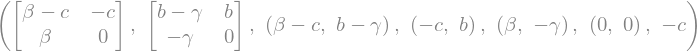

In [5]:
from typing import Literal

class Reward:
    """
        output the symbol reward matrix or the symbol expression of the element in the reward matrix

        init: 
            reward = Reward()

        example:
            case1: reward['do'], reward['re'] ... , return symbol matrix
            case2: reward['C', 'C'], reward['C', 'D'], reward['D', 'C'], reward['D', 'D'] ... , return binary tuple of symbol expression
            case3: reward['C', 'D', 'do'] ... , return symbol expression
    """
    def __init__(self) -> None:
        self.reward = list()
        self.reward.append(sympy.Matrix(
            [[beta - c, -c],
                [beta, 0]]))
        self.reward.append(sympy.Matrix(
            [[b - gamma, b],
             [-gamma, 0]]
        ))
    def get_reward(self, do_action: Literal['C', 'D'], re_action: Literal['C', 'D'], role: Literal['do', 're']) -> sympy.Symbol:
        row = 0 if do_action == "C" else 1
        col = 0 if re_action == "C" else 1
        
        if role == "do": 
            return self.reward[0][row, col]
        else:
            return self.reward[1][row, col]

    def get_reward_mat(self, role: Literal['do', 're']) -> sympy.Matrix:
        if role == "do":
            return self.reward[0]
        else:
            return self.reward[1]

    def get_reward_tuple(self, do_action: Literal['C', 'D'], re_action: Literal['C', 'D']) -> [sympy.Symbol, sympy.Symbol]:
        row = 0 if do_action == "C" else 1
        col = 0 if re_action == "C" else 1

        return (self.reward[0][row, col], self.reward[1][row, col])
    
    def __getitem__(self, keys):
        """
        output the symbol reward matrix or the symbol expression of the element in the reward matrix

        example:
            case1: rewardMat['do'], rewardMat['re'] ... , return symbol matrix
            case2: rewardMat['C', 'C'], rewardMat['C', 'D'], rewardMat['D', 'C'], rewardMat['D', 'D'] ... , return binary tuple of symbol expression
            case3: rewardMat['C', 'D', 'do'] ... , return symbol expression

        Args:
            keys (_type_): _description_

        Raises:
            KeyError: _description_

        Returns:
            Any: _description_
        """
        if isinstance(keys, str):
            assert keys in {'do', 're'}
            return self.get_reward_mat(keys)
        elif isinstance(keys, tuple):
            assert keys[0] in {'C', 'D'}
            assert keys[1] in {'C', 'D'}
            if len(keys) == 3:
                assert keys[2] in {'do', 're'}
                return self.get_reward(keys[0], keys[1], keys[2])
            elif len(keys) == 2:
                return self.get_reward_tuple(keys[0], keys[1])
        raise KeyError("Wrong key")


rewardMat = Reward()
rewardMat.get_reward_mat("donor")
sympy.init_printing()
rewardMat['do'], rewardMat['re'], rewardMat['C', 'C'], rewardMat['C', 'D'], rewardMat['D', 'C'], rewardMat['D', 'D'], rewardMat['C', 'D', 'do']

## 2. Socail norm

socail norm 决定了每次博弈中的声誉变化规则，博弈双方的动作将会改变接收者的声誉。双方行动对接收者声誉的影响可以用下表表示

A socail norm determines the reputation changerule in each game, and the actions of both parties will change the reputation of the recipient. The impact of the actions of both parties on the reputation of the recipient can be represented by the following table

| $do$'s action | C | C | D | D |
| --- | --- | --- | --- | --- |
| $re$'s action | C | D | C | D |
| $re$'s new reputation | $s_1$ | $s_2$ | $s_3$ | $s_4$ |

$s$的取值是$0$或$1$，$0$表示坏声誉，$1$表示好声誉。因此使用$s_1$, $s_2$, $s_3$, $s_4$ 的二进制位解释表达来为不同的 social norm 编号

$s$ takes the value of $0$ or $1$, $0$ represents bad reputation, and $1$ represents good reputation. Therefore, use the binary bit interpretation expression of $s_1$, $s_2$, $s_3$, $s_4$ to number different social norms

以 norm10 为例：

Take norm10 as an example:

| $do$'s action | C | C | D | D |
| --- | --- | --- | --- | --- |
| $re$'s action | C | D | C | D |
| $re$'s new reputation | 1 | 0 | 1 | 0 |

社会规范决定了博弈过程中接收者的声誉变化过程，表示为函数 $N_j(action^{do}, action^{re}) = s', 0 \leq j \leq 15 \land j \in Z $，其中 $s$ 表示接收者博弈之前的声誉状态，$s'$ 表示此次博弈后接收者的声誉状态。

The social norm determines the reputation change process of the recipient in the game process, expressed as the function $g$, $g(action^{do}, action^{re}) = s'$, where $s$ represents the reputation state of the recipient before the game, and $s'$ represents the reputation of the recipient after this game state.

In [6]:
# norm
from typing import Literal
class Norm():
    new_reputation = {}
    def __init__(self, code_no:int) -> None:
        # calculate the four-digit binary code of code_no
        ns = []
        for i in range(4):
            ns.append(code_no % 2)
            code_no = code_no // 2
        ns.reverse()
        # change the 0,1 in ns to '0', '1'
        ns = [str(n) for n in ns]
        self.new_reputation = {
        ('C', 'C') : ns[0],
        ('C', 'D') : ns[1],
        ('D', 'C') : ns[2],
        ('D', 'D') : ns[3]
        }
    def __getitem__(self, actions: tuple[Literal['C', 'D'], Literal['C', 'D']]) -> str:
        do_action, re_action = actions
        assert do_action in {'C', 'D'}, "do_action must be 'C' or 'D'"
        assert re_action in {'C', 'D'}, "re_action must be 'C' or 'D'"
        return self.new_reputation[(do_action, re_action)]

norm10 = Norm(10)
norm10[('C', 'C')], norm10[('C', 'D')], norm10[('D', 'C')], norm10[('D', 'D')]

('1', '0', '1', '0')

## 3. a recipient's reputation state transition under the specific norm rule and strategies of two sides in continuous two-player game

donor 根据接受者的声誉状态 $s$ 选择是否合作 $\pi^{do} (s) = action^{do}$，recipient 根据donor对自己的行为选择是否合作 $\pi^{re} (action^{re}) = action^{re}$

A donor chooses whether to cooperate according to the reputation state $s$ of the recipient $\pi^{do} (s) = action^{do}$, and the recipient chooses whether to cooperate according to the donor's behavior towards himself $\pi^{re} (action^{re}) = action^{re}$

因此，对于 donor 和 recipient 都有四种可能的策略，$\pi_k^i, i \in \{do, re\} \land k \in \{1, 2, 3, 4\}$

Therefore, there are four possible strategies for both the donor and the recipient, $\pi_k^i, i \in \{do, re\} \land k \in \{1, 2, 3, 4\}$

对 donor，存在策略：总是合作$C=\pi_1^{do}$；对手声誉好就合作，对手声誉差就背叛$DISC=\pi_2^{do}$；对手声誉好就背叛，对手声誉差就合作$NDISC=\pi_3^{do}$，总是背叛$D=\pi_4^{do}$

For the donor, there are strategies: always cooperate $C=\pi_1^{do}$; cooperate if the opponent's reputation is good, defect if the opponent's reputation is bad $DISC=\pi_2^{do}$; defect if the opponent's reputation is good, cooperate if the opponent's reputation is bad $NDISC=\pi_3^{do}$, always defect $D=\pi_4^{do}$.

C:

|$re$'s reputation  | 0 | 1 |
| :---------------------- | :---: | :---: |
| $do$'s action | C | C |

DISC:

|$re$'s reputation  | 0 | 1 |
| :---------------------- | :---: | :---: |
| $do$'s action | D | C |

NDISC:

|$re$'s reputation  | 0 | 1 |
| :---------------------- | :---: | :---: |
| $do$'s action | C | D |

D:
| $re$'s reputation  | 0 | 1 |
| :---------------------- | :---: | :---: |
| $do$'s action | D | D |

对 recipient，存在策略：从不回馈$NR=\pi_1^{re}$；亲社会性回馈（对手合作就合作，对手背叛就背叛）$SR=\pi_2^{re}$；反社会性回馈（对手合作就背叛，对手背叛就合作）$AR=\pi_3^{re}$，无条件回馈$UR=\pi_4^{re}$

For recipient, there are strategies: never reward $NR=\pi_1^{re}$; prosocial reward (cooperate if the opponent cooperates, defect if the opponent defects) $SR=\pi_2^{re}$; antisocial reward (defect if the opponent cooperates, cooperate if the opponent defects) $AR=\pi_3^{re}$, unconditional reward $UR=\pi_4^{re}$

NR:

|$do$'s action  | C | D |
| :---------------------- | :---: | :---: |
| $re$'s action | D | D |

SR:

|$do$'s action  | C | D |
| :---------------------- | :---: | :---: |
| $re$'s action | C | D |

AR:

| $do$'s action  | C | D |
| :---------------------- | :---: | :---: |
| $re$'s action | D | C |

UR:
| $do$'s action  | C | D |
| :---------------------- | :---: | :---: |
| $re$'s action | C | C |

<!-- $f(action^{do}, action^{re}) = (R^{do}, R^{re})$ -->

$$
\begin{equation}
    \begin{aligned}
    \begin{cases}
    \pi_{k_1}^{do}(s) = action^{do} \\
    \pi_{k_2}^{re} (action^{do}) = action^{re} \\
    N_j(action^{do}, action^{re}) = s'
    \end{cases}
    \end{aligned}
\end{equation}
$$

<!-- curry化 -->

求得：

obtain:

$$
\begin{equation}
    \begin{aligned}
        \pi_{k_2}^{re} (\pi_{k_1}^{do} (s)) &= action^{re} \\
        N_j(\pi_{k_1}^{do} (s), \pi_{k_2}^{re} (\pi_{k_1}^{do} (s))) &= s'
    \end{aligned}
\end{equation}
$$

<!-- 简化为 g'函数，可能存在表达问题，数学不严谨，将函数作为函数的输入 -->
令

Let

$$
\begin{equation}
    \begin{aligned}
        h(s, \pi_{k_1}^{do}, \pi_{k_2}^{re}, N_j) = N_j(\pi_{k_1}^{do} (s), \pi_{k_2}^{re} (\pi_{k_1}^{do} (s))) = s'
    \end{aligned}
\end{equation}
$$

<!-- TODO: 策略非确定的情境下？ -->

根据上式，在两人连续博弈的情景下，捐赠者和接收者的策略确定，接收者的声誉状态变化过程满足马尔可夫性质，为计算每种策略的期望价值，将该博弈过程作为马尔可夫奖励过程进行分析。

According to the above formula, in the scenario of continuous two-player games, the strategies of the donor and the recipient are determined, and the reputation state change process of the recipient satisfies the Markov property. To calculate the expected value of each strategy, the game process is used as a Markov reward process for analysis.


<!-- 如果状态转移不只依赖于上一个状态，那算马尔科夫过程吗？算，只要其他参数和更之前的状态无关就满足马尔可夫性质，因此一个马尔可夫过程由 s, 和状态转移矩阵p决定，当 p为动态的时候，为拓展马尔可夫过程 -->

<!-- MRP（Markov Reward Process）和MDP（Markov Decision Process）都是马尔可夫过程的扩展，但它们的关注点和应用场景有所不同。
1. MRP（Markov Reward Process）：在马尔可夫过程的基础上，MRP引入了奖励的概念。每个状态都有一个与之关联的奖励，状态转移时会获得这个奖励。MRP主要用于评估和比较不同的状态，但它没有考虑行动的影响。
2. MDP（Markov Decision Process）：在MRP的基础上，MDP进一步引入了行动的概念。在每个状态，决策者可以选择一个行动，然后环境根据当前的状态和选择的行动转移到下一个状态，并给出一个奖励。MDP主要用于决策理论和强化学习。
所以，MDP是MRP的扩展，它包含了行动的影响，使得它可以用于描述决策问题。 -->

In [7]:
from typing import Literal
# strategy
class Stg():
    STG_FUNC = {
        'C': lambda input: 'C',
        'DISC': lambda input: 'C' if input == '1' else 'D',
        'NDISC': lambda input: 'D' if input == '1' else 'C',
        'D': lambda input: 'D',
        'NR': lambda input: 'D',
        'SR': lambda input: 'C' if input == 'C' else 'D',
        'AR': lambda input: 'D' if input == 'C' else 'C',
        'UR': lambda input: 'C'
    }
    def __init__(self, stg_name: Literal['C', 'DISC', 'NDISC', 'D', 'NR', 'SR', 'AR', 'UR']) -> None:
        assert stg_name in {'C', 'DISC', 'NDISC', 'D', 'NR', 'SR', 'AR', 'UR'}, "stg_name must be 'C', 'DISC', 'NDISC', 'D', 'NR', 'SR', 'AR', 'UR'"
        self.stg_name = stg_name
        self.stg = self.STG_FUNC[self.stg_name]

    def __getitem__(self, input: Literal['C', 'D', '0', '1']) -> Literal['C', 'D']:
        if self.stg_name in {'C', 'DISC', 'NDISC', 'D'}:
            assert input in {'0', '1'}, "donor strategy's input must be '1' or '0'"
        elif self.stg_name in {'NR', 'SR', 'AR', 'UR'}:
            assert input in {'C', 'D'}, "receiver strategy's input must be 'C' or 'D'"
        else:
            raise KeyError("Wrong stg_name")

        return self.stg(input)

# class stg's test cases
assert Stg('C')['0'] == 'C'
assert Stg('C')['1'] == 'C'
assert Stg('DISC')['0'] == 'D'
assert Stg('DISC')['1'] == 'C'
assert Stg('NDISC')['0'] == 'C'
assert Stg('NDISC')['1'] == 'D'
assert Stg('D')['0'] == 'D'
assert Stg('D')['1'] == 'D'
assert Stg('NR')['C'] == 'D'
assert Stg('NR')['D'] == 'D'
assert Stg('SR')['C'] == 'C'
assert Stg('SR')['D'] == 'D'
assert Stg('AR')['C'] == 'D'
assert Stg('AR')['D'] == 'C'
assert Stg('UR')['C'] == 'C'
assert Stg('UR')['D'] == 'C'

### 2.2. Markov Reward Process

Markov Reward Process 可以用四元组 $ <\mathcal{S}, \mathbf{T}, \mathbf{R}, \lambda> $ 表示，其中 $T$表示一步状态转移概率矩阵，$\lambda$表示折扣因子。

Markov Reward Process can be represented by a quadruple $ <\mathcal{S}, \mathbf{T}, \mathbf{R}, \lambda> $, where $\mathbf{T}$ represents a one-step state transition probability matrix, and $\lambda$ represents a discount factor.



### 2.3. Compute $\mathbf{T}$

由状态转移公式

From the state transition formula

$$
\begin{equation}
    \begin{aligned}
        N_j(\pi_k^{do} (s), \pi_k^{re} (\pi_k^{do} (s))) &= s'
    \end{aligned}
\end{equation}
$$

一步状态转移概率矩阵 $\mathbf{T}$ 由函数$\pi_k^{do}$，$\pi_k^{re}$和$N_j$ 决定

one-step state transition probability matrix T is determined by functions $\pi_k^{do}$, $\pi_k^{re}$ and $N_j$

设当前状态分布行向量为 $\mathbf{P} = (p_{s=0}, p_{s=1})$，则下一状态分布为 $\mathbf{P'} = (p'_{s=0}, p'_{s=0})$，由于是两人博弈，因此 $p_s, p'_s \in \{0, 1\} \land p_{s=0} + p_{s=1} = 1 \land p'_{s=0} + p'_{s=1} = 1$

Let the current state distribution row vector be $\mathbf{P} = (p_{s=0}, p_{s=1})$, then the next state distribution is $\mathbf{P'} = (p'_{s=0}, p'_{s=0})$, since it is a two-player game, $p_s, p'_s \in \{0, 1\} \land p_{s=0} + p_{s=1} = 1 \land p'_{s=0} + p'_{s=1} = 1$

$$
\mathbf{P} \mathbf{T} = \mathbf{P} \begin{pmatrix} T_{00} & T_{01} \\ T_{10} & T_{11} \end{pmatrix} = \mathbf{P'}
$$

以 $\pi_{k_1}^{do} = D$, $\pi_{k_2}^{re} = NR$, $N_j = N_{10}$ 为例，计算 $\mathbf{T}$

Take $\pi_{k_1}^{do} = D$, $\pi_{k_2}^{re} = NR$, $N_j = N_{10}$ as an example, calculate $\mathbf{T}$

$h(s, D, NR, N_{10}) = s'$ 的值表为

The value table of $h(s, D, NR, N_{10}) = s'$ is

| $s$ | 0 | 1 |
| --- | --- | --- |
| $do$'s action | D | D |
| $re$'s action | D | D |
| $s'$ | 0 | 0 |

根据值表

According to the value table

$$
\begin{equation}
    \begin{aligned}
    \begin{cases}
    (1, 0) \begin{pmatrix} T_{00} & T_{01} \\ T_{10} & T_{11} \end{pmatrix} = (1, 0) \quad, \text{if } s = 0 \\
    (0, 1) \begin{pmatrix} T_{00} & T_{01} \\ T_{10} & T_{11} \end{pmatrix} = (1, 0) \quad, \text{if } s = 1 \\
    T_{00} + T_{01} = 1 \\
    T_{10} + T_{11} = 1
    \end{cases}
    \Rightarrow
    T = \begin{pmatrix} 1 & 0 \\ 1 & 0 \end{pmatrix}
    \end{aligned}
\end{equation}
$$

其状态转移过程可以用下图表示

The state transition process can be represented by the following figure

![D-NR_state_tran](./.asserts/D-NR_state_tran.jpg)

该 $\mathbf{T}$ 对应的 $\mathbf{R}$ 为

The $\mathbf{T}$ corresponding to $\mathbf{R}$ is

$$
\begin{equation}
    \begin{aligned}
    \mathbf{R} = \begin{pmatrix} R_0^{do} & R_0^{re} \\ R_1^{do} & R_1^{re} \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}
    \end{aligned}
\end{equation}
$$

In [8]:
# global variables
T = sympy.Matrix([[sympy.Symbol(r"T_{00}"), sympy.Symbol(r"T_{01}")], [sympy.Symbol(r"T_{10}"), sympy.Symbol(r"T_{11}")]])
s0_dis = sympy.Matrix([[1, 0]])
s1_dis = sympy.Matrix([[0, 1]])
do_stg_names = ['C', 'DISC', 'NDISC', 'D']
re_stg_names = ['NR', 'SR', 'AR', 'UR']
do_stgs = [Stg(name) for name in do_stg_names]
re_stgs = [Stg(name) for name in re_stg_names]

In [9]:
# donor strategy, recipient strategy, social norm -> T
def generate_value_table(do_stg, re_stg, norm):
    # 生成 s -> s', do reward, re reward的 value table
    reward_dict = {}
    new_reputation_dict = {}
    states = ['0', '1']
    for s in states:
        do_action = do_stg[s]
        re_action = re_stg[do_action]
        do_reward, re_reward = rewardMat[do_action, re_action]
        reward_dict[s] = (do_reward, re_reward)
        new_reputation_dict[s] = norm[(do_action, re_action)]
    return reward_dict, new_reputation_dict

reward_dict, new_reputation_dict= generate_value_table(do_stgs[3], re_stgs[0], Norm(10))
print(new_reputation_dict)
# ((R_0^{do}, R_1^{do}), (R_0^{re}, R_1^{re})
reward_dict['0'], reward_dict['1']

{'0': '0', '1': '0'}


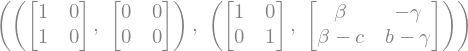

In [10]:
def calculate_T(do_stg:Stg, re_stg:Stg, norm:Norm, s0_dis:sympy.Matrix, s1_dis:sympy.Matrix, T:sympy.Matrix):
    """calculate T by do_stg, re_stg, norm

    Args:
        do_stg (Stg): do's strategy
        re_stg (Stg): re's strategy
        norm (Norm): social norm
        s0_dis (sympy.Matrix): distribution of states in state 0, example: sympy.Matrix([[1, 0]]), the column vector in sympy.Matrix must [[1,0]]
        s1_dis (sympy.Matrix): distribution of states in state 1, example: sympy.Matrix([[0, 1]]), the column vector in sympy.Matrix must [[0,1]]
        T (sympy.Matrix): transition matrix, example: sympy.Matrix([[sympy.Symbol(r"T_{00}"), sympy.Symbol(r"T_{01}")], [sympy.Symbol(r"T_{10}"), sympy.Symbol(r"T_{11}")]])

    Returns:
        _type_: _description_
    """
    assert do_stg.stg_name in do_stg_names, f"do_stg.stg_name must be in {do_stg_names}"
    assert re_stg.stg_name in re_stg_names, f"re_stg.stg_name must be in {re_stg_names}"
    reward_dict, new_reputation_dict= generate_value_table(do_stg, re_stg, norm)
    ls_s = ['0', '1']
    ls_s_ = [new_reputation_dict['0'], new_reputation_dict['1']]
    for i in range(len(ls_s)):
        s, s_ = ls_s[i], ls_s_[i]
        if s == '0':
            if s_ == '0':
                eq1 = sympy.Eq(s0_dis * T, s0_dis)
            elif s_ == '1':
                eq1 = sympy.Eq(s0_dis * T, s1_dis)
            else:
                raise KeyError("Wrong s_")
        elif s == '1':
            if s_ == '0':
                eq2 = sympy.Eq(s1_dis * T, s0_dis)
            elif s_ == '1':
                eq2 = sympy.Eq(s1_dis * T, s1_dis)
            else:
                raise KeyError("Wrong s_")
        else:
            raise KeyError("Wrong s")
    # the sum of each row in T is 1
    sum_expr_ls = []
    for r in range(T.rows):
        sum_expr = 0
        for c in range(T.cols):
            sum_expr += T[r, c]
        sum_expr_ls.append(sum_expr)
    other_eqs = [sympy.Eq(sum_expr, 1) for sum_expr in sum_expr_ls]
    # will solve the equation to get a res like {T_{00} : 1/2, T_{01} : 1/2, T_{10} : 1/2, T_{11} : 1/2}
    solution_T_dict = sympy.solve([eq1, eq2, *other_eqs], T)
    T_value = sympy.Matrix([[solution_T_dict[T[0, 0]], solution_T_dict[T[0, 1]]], [solution_T_dict[T[1, 0]], solution_T_dict[T[1, 1]]]])
    # R_{0}^{do}, R_{0}^{re}
    # R_{1}^{do}, R_{1}^{re}
    do = 0
    re = 1
    R_expr = sympy.Matrix([[reward_dict['0'][do], reward_dict['0'][re]], [reward_dict['1'][do], reward_dict['1'][re]]])

    return T_value, R_expr

calculate_T(Stg('D'), Stg('NR'), Norm(10), s0_dis, s1_dis, T), calculate_T(Stg('DISC'), Stg('UR'), Norm(9), s0_dis, s1_dis, T)

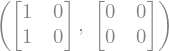

In [11]:
# generate all T and corresponding R  make (do_stg, re_stg, norm -> T, R) a data structure
from typing import Literal

class TR():
    tr_dict = {}
    stable_dict = {}
    def __init__(self) -> None:
        for norm_no in range(16):
            for do_stg in do_stgs:
                for re_stg in re_stgs:
                        norm = Norm(norm_no)
                        T = sympy.Matrix([[sympy.Symbol(r"T_{00}"), sympy.Symbol(r"T_{01}")], [sympy.Symbol(r"T_{10}"), sympy.Symbol(r"T_{11}")]])
                        T, R = calculate_T(do_stg, re_stg, norm, s0_dis, s1_dis, T)
                        self.tr_dict[(do_stg.stg_name, re_stg.stg_name, norm_no)] = (T, R)
    def __getitem__(self, keys) -> tuple[sympy.Matrix, sympy.Matrix]:
        """return T and R

        Args:
            keys (_type_): _description_

        Returns:
            tuple[sympy.Matrix, sympy.Matrix]: T, R
        """
        do_stg_name, re_stg_name, norm_no = keys
        assert do_stg_name in do_stg_names, f"do_stg_name must be in {do_stg_names}"
        assert re_stg_name in re_stg_names, f"re_stg_name must be in {re_stg_names}"
        assert norm_no in range(16), "norm_no must be in range(16)"
        return self.tr_dict[(do_stg_name, re_stg_name, norm_no)]
    
    def get_tr_by_norm(self, norm_no:int):
        assert norm_no in range(16), "norm_no must be in range(16)"
        res = []
        for d in do_stgs:
            for r in re_stgs:
                res.append(self.tr_dict[(d.stg_name, r.stg_name, norm_no)])
        return *res,

trs = TR()
trs['D', 'NR', 10]

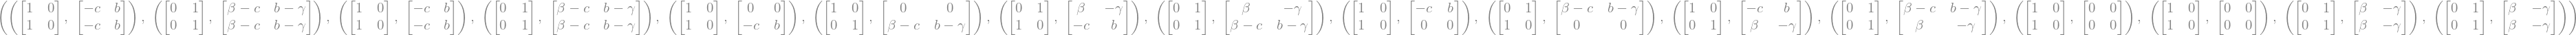

In [12]:
# get T, R in specific norm, this is equivalent to the result computed manually
trs.get_tr_by_norm(10)

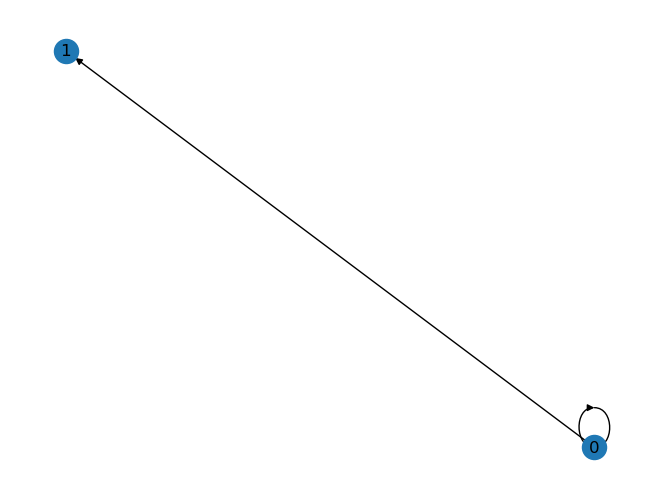

In [13]:
# TODO: generate transition graph 

# 用 social norm 生成对应的 T
# use social norm to generate T

from enum import Enum
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph 
import matplotlib.pyplot as plt



# 创建一个有向图来表示状态机
G = nx.DiGraph()
# 状态空间大小为 2，状态为 0 和 1，创建枚举
S0 = '0'
S1 = '1'

CC = 'CC'
CD = 'CD'
DC = 'DC'
DD = 'DD'

# 添加状态和转换
G.add_edge(S0, S0, action=CD, probability=1)
G.add_edge(S0, S1, action=CC, probability=1)
# G.add_edge('state3', 'state1', action='action4', probability=1.0)

# 使用pygraphviz将图转换为DOT格式
# A = to_agraph(G) 
# A.write('fsm.dot')

# 显示 networkx 图
nx.draw(G, with_labels=True)
plt.show()

## 3. value computation

$i$ 表示博弈参与者编号

$i$ represents the number of game participants

$$
\begin{equation}
    \begin{aligned}
        V_s^i(\mathbf{X})&=\mathbb{E}_\mathbf{X}[G^i(t)|s(t)=s] \\
        &=\mathbb{E}_\mathbf{X}[(1 - \lambda) \sum_{k=0}^{\infty} \lambda^k r^i(t+k) | s(t) = s] \\
        &=(1 - \lambda) \mathbb{E}_\mathbf{X}[\sum_{k=0}^{\infty} \lambda^k r^i(t+k) | s(t) = s] \\
        &=(1 - \lambda) \mathbb{E}_\mathbf{X}[r^i(t) + \lambda \sum_{k=1}^{\infty} \lambda^{k-1} r^i(t+k) | s(t) = s] \\
        &\overset{k = k + 1}{=} (1 - \lambda) \mathbb{E}_\mathbf{X}[r^i(t) + \lambda \sum_{k=0}^{\infty} \lambda^{k} r^i(t+k+1) | s(t) = s] \\
        &= \mathbb{E}_\mathbf{X} [(1-\lambda) r^i(t) + \lambda V_{s'}^i(\mathbf{X}) | s(t) = s, s(t + 1) = s'] \\
    \end{aligned}
\end{equation}
$$

有向量 $\mathbf{V}^i(\mathbf{X}) \in \mathbb{R}^{|\mathcal{S}|}$ 表示博弈参与者 $i$ 在状态 $s$ 下的价值函数，其中 $\mathcal{S}$ 表示状态空间。

The vector $\mathbf{V}^i(\mathbf{X}) \in \mathbb{R}^{|\mathcal{S}|}$ represents the value function of game participant $i$ in state $s$, where $\mathcal{S}$ represents the state space.

$$
\begin{equation}
    \begin{aligned}
        \mathbf{V}^i(\mathbf{X}) &= \begin{pmatrix} V_0^i(\mathbf{X}) \\ V_1^i(\mathbf{X}) \end{pmatrix} \\
    \end{aligned}
\end{equation}
$$

$V_0^i(\mathbf{X})$ 表示博弈参与者 $i$ 在坏声誉下的价值函数，$V_1^i(\mathbf{X})$ 表示 $i$ 在好声誉下的价值函数。

$V_0^i(\mathbf{X})$ represents the value function of game participant $i$ in bad reputation, and $V_1^i(\mathbf{X})$ represents the value function of $i$ in good reputation.

在本论文的情境中，状态空间 $\mathcal{S}$ 为单次博弈过程中接收者的声誉状态，用$0$代表坏声誉，用$1$代表好声誉，因此 $\mathcal{S} = \{0, 1\}$。

In the context of this paper, the state space $\mathcal{S}$ is the reputation state of the recipient in a single game process, with $0$ representing bad reputation and $1$ representing good reputation, so $\mathcal{S} = \{0, 1\}$.

有期望收益矩阵 $\mathbb{E}_\mathbf{X}[\mathbf{R}]^i \in \mathbb{R}^{|\mathcal{S}|} $ 表示 $i$ 在各状态下的期望收益。

The expected reward matrix $\mathbb{E}_\mathbf{X}[\mathbf{R}]^i \in \mathbb{R}^{|\mathcal{S}|} $ represents the expected reward of $i$ in each state.

对于$\mathbb{E}_\mathbf{X}[\mathbf{R}]^i$

for $\mathbb{E}_\mathbf{X}[\mathbf{R}]^i$

$$
\mathbb{E}_\mathbf{X} [\mathbf{R}]^i = \begin{pmatrix} R_0^i \\ R_1^i \end{pmatrix}
$$

$R_0^i$ 表示博弈参与者 $i$ 在坏声誉下的期望收益，$R_1^i$ 表示 $i$ 在好声誉下的期望收益。

$R_0^i$ represents the expected payoff of game participant $i$ in bad reputation, and $R_1^i$ represents the expected payoff of $i$ in good reputation.

有期望一步转移概率矩阵 $\mathbb{E}_\mathbf{X} [\mathbf{T}] = \begin{pmatrix} T_{00} & T_{01} \\ T_{10} & T_{11} \end{pmatrix} \in \mathbb{R}^{|\mathcal{S}| \times |\mathcal{S}|}$ 表示博弈参与者的声誉状态转移概率。

The expected one-step transition probability matrix $\mathbb{E}_\mathbf{X} [\mathbf{T}] = \begin{pmatrix} T_{00} & T_{01} \\ T_{10} & T_{11} \end{pmatrix} \in \mathbb{R}^{|\mathcal{S}| \times |\mathcal{S}|}$ represents the reputation state transition probability of game participants.

### 3.1. Compute the $\mathbf{V}^i(\mathbf{X})$ under non-specific social norms

$$
\begin{equation}
    \begin{aligned}
    \mathbf{V}^i(\mathbf{X}) &= (1 - \lambda) \mathbb{E}_\mathbf{X}[\mathbf{R}]^i + \lambda \mathbb{E}_\mathbf{X} [\mathbf{T}] \mathbf{V}^i(\mathbf{X})\\
    &= (1 - \lambda) (I_2  - \lambda \mathbb{E}_\mathbf{X} [\mathbf{T}])^{-1} \mathbb{E}_\mathbf{X}[\mathbf{R}]^i \\
    \end{aligned}
\end{equation}
$$

带入 $ \mathbb{E}_\mathbf{X} [\mathbf{T}] $ 和 $ \mathbb{E}_\mathbf{X}[\mathbf{R}]^i $ 得到

Substituting $\mathbb{E}_\mathbf{X} [\mathbf{T}]$ and $\mathbb{E}_\mathbf{X}[\mathbf{R}]^i$ into the above equation

$$
\begin{equation}
    \begin{aligned}
\mathbf{V}^i(x) &= \frac{1-\lambda}{(1-\lambda T_{00})(1-\lambda T_{11})-\lambda^2T_{01}T_{10}} \begin{pmatrix} 1 - T_{11} \lambda & T_{01} \lambda\\T_{10} \lambda & 1 - T_{00} \lambda \end{pmatrix} \begin{pmatrix}R_{0}^i\\R_{1}^i\end{pmatrix} \\
&= \frac{1-\lambda}{(1-\lambda T_{00})(1-\lambda T_{11})-\lambda^2T_{01}T_{10}} \binom{(1-\lambda T_{11})R_0^i+\lambda T_{01}R_1^i}{(1-\lambda T_{00})R_1^i+\lambda T_{10}R_0^i} \\
    \end{aligned}
\end{equation}
$$

$\mathbf{V}^i(x) \in \mathbb{R}^{|\mathcal{S}|}$ 可以表示为 $\mathbf{V}(x) \in \mathbb{R}^{|\mathcal{S}| \times |\mathcal{S}|}$

$\mathbf{V}^i(x) \in \mathbb{R}^{|\mathcal{S}|}$ can be represented as $\mathbf{V}(x) \in \mathbb{R}^{|\mathcal{S}| \times |\mathcal{S}|}$


在论文中，$i \in \{do, re\}$，$do$ 表示捐赠者，$re$ 表示接受者。

In the paper, $i \in \{do, re\}$, $do$ represents the donor, and $re$ represents the recipient.

$$
\begin{equation}
    \begin{aligned}
        \mathbf{V} &= \begin{bmatrix} \mathbf{V}^{do} & \mathbf{V}^{re} \end{bmatrix} \\
        & =  \frac{1-\lambda}{(1-\lambda T_{00})(1-\lambda T_{11})-\lambda^2T_{01}T_{10}} \begin{pmatrix} 1- T_{11} \lambda & T_{01} \lambda\\T_{10} \lambda & 1- T_{00} \lambda \end{pmatrix} \begin{pmatrix}R_0^{do} & R_0^{re}\\R_1^{do} & R_1^{re}\end{pmatrix} \\
        & = \frac{1 - \lambda}{(1-\lambda T_{00})(1-\lambda T_{11})-\lambda^2T_{01}T_{10}}
\begin{pmatrix}R_0^{do} \left( 1 - T_{11} \lambda\right) + R_1^{do} T_{01} \lambda & R_0^{re} \left( 1 - T_{11} \lambda\right) + R_1^{re} T_{01} \lambda\\R_0^{do} T_{10} \lambda + R_1^{do} \left( 1 - T_{00} \lambda\right) & R_0^{re} T_{10} \lambda + R_1^{re} \left( 1- T_{00} \lambda \right)\end{pmatrix}
    \end{aligned}
\end{equation}

### 3.2. compute $\mathbf{V}^i$ using sympy

Matrix([[(-T11*lamda + 1)/(T00*T11*lamda**2 - T00*lamda - T01*T10*lamda**2 - T11*lamda + 1), T01*lamda/(T00*T11*lamda**2 - T00*lamda - T01*T10*lamda**2 - T11*lamda + 1)], [T10*lamda/(T00*T11*lamda**2 - T00*lamda - T01*T10*lamda**2 - T11*lamda + 1), (-T00*lamda + 1)/(T00*T11*lamda**2 - T00*lamda - T01*T10*lamda**2 - T11*lamda + 1)]])
\frac{1 - \lambda}{T_{00} T_{11} \lambda^{2} - T_{00} \lambda - T_{01} T_{10} \lambda^{2} - T_{11} \lambda + 1}
\left[\begin{matrix}- T_{11} \lambda + 1 & T_{01} \lambda\\T_{10} \lambda & - T_{00} \lambda + 1\end{matrix}\right]
\left[\begin{matrix}R_{0}\\R_{1}\end{matrix}\right]


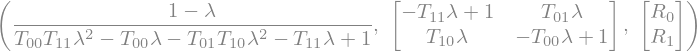

In [14]:
import sympy
# 使用sympy进行矩阵解析式的推导
# use sympy to derive the matrix expression

E = sympy.eye(2)

T = sympy.Matrix([[sympy.Symbol('T00'), sympy.Symbol('T01')],
                  [sympy.Symbol('T10'), sympy.Symbol('T11')]])

lamda = sympy.Symbol("lamda")
temp_mat = E - lamda * T
temp_mat = temp_mat.inv()
print(temp_mat)

# 提取公因子化简temp_mat
# extract the common factor to simplify temp_mat
gcd = sympy.gcd(temp_mat[0, 0], temp_mat[0, 1])
temp_mat = temp_mat / gcd
gcd  = (1 - lamda) * gcd

Ri = sympy.Matrix([[sympy.Symbol('R0')], [sympy.Symbol('R1')]])
# temp_mat * R

# result
sympy.init_printing()
print(sympy.latex(gcd))
print(sympy.latex(temp_mat))
print(sympy.latex(Ri))
gcd, temp_mat, Ri

In [15]:
# 推广到metagame
import sympy
# 使用sympy进行矩阵解析式的推导
# use sympy to derive the matrix expression

E = sympy.eye(2)

T = sympy.Matrix([[sympy.Symbol('T00'), sympy.Symbol('T01')],
                  [sympy.Symbol('T10'), sympy.Symbol('T11')]])

lamda = sympy.Symbol("lamda")
temp_mat = E - lamda * T
temp_mat = temp_mat.inv()
print(temp_mat)

# 提取公因子化简temp_mat
# extract the common factor to simplify temp_mat
gcd = sympy.gcd(temp_mat[0, 0], temp_mat[0, 1])
temp_mat = temp_mat / gcd
gcd  = (1 - lamda) * gcd

Ri = sympy.Matrix([[sympy.Symbol('R0')], [sympy.Symbol('R1')]])
# temp_mat * R

# result
print(sympy.latex(gcd))
print(sympy.latex(temp_mat))
print(sympy.latex(Ri))
sympy.init_printing()
gcd, temp_mat, Ri, gcd.subs

Matrix([[(-T11*lamda + 1)/(T00*T11*lamda**2 - T00*lamda - T01*T10*lamda**2 - T11*lamda + 1), T01*lamda/(T00*T11*lamda**2 - T00*lamda - T01*T10*lamda**2 - T11*lamda + 1)], [T10*lamda/(T00*T11*lamda**2 - T00*lamda - T01*T10*lamda**2 - T11*lamda + 1), (-T00*lamda + 1)/(T00*T11*lamda**2 - T00*lamda - T01*T10*lamda**2 - T11*lamda + 1)]])
\frac{1 - \lambda}{T_{00} T_{11} \lambda^{2} - T_{00} \lambda - T_{01} T_{10} \lambda^{2} - T_{11} \lambda + 1}
\left[\begin{matrix}- T_{11} \lambda + 1 & T_{01} \lambda\\T_{10} \lambda & - T_{00} \lambda + 1\end{matrix}\right]
\left[\begin{matrix}R_{0}\\R_{1}\end{matrix}\right]


((1 - lamda)/(T00*T11*lamda**2 - T00*lamda - T01*T10*lamda**2 - T11*lamda + 1),
 Matrix([
 [-T11*lamda + 1,      T01*lamda],
 [     T10*lamda, -T00*lamda + 1]]),
 Matrix([
 [R0],
 [R1]]),
 <bound method Basic.subs of (1 - lamda)/(T00*T11*lamda**2 - T00*lamda - T01*T10*lamda**2 - T11*lamda + 1)>)

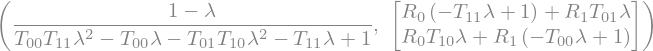

In [16]:
gcd, temp_mat*Ri

### 3.3. compute $\mathbf{V}$ using sympy

\left[\begin{matrix}R_0^{do} & R_0^{re}\\R_1^{do} & R_1^{re}\end{matrix}\right]


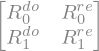

In [17]:
R = sympy.Matrix([[sympy.Symbol(r'R_0^{do}'), sympy.Symbol(r'R_0^{re}')], [sympy.Symbol(r'R_1^{do}'), sympy.Symbol(r'R_1^{re}')]])
print(sympy.latex(R))
R

\frac{1 - \lambda}{T_{00} T_{11} \lambda^{2} - T_{00} \lambda - T_{01} T_{10} \lambda^{2} - T_{11} \lambda + 1}
\left[\begin{matrix}R_0^{do} \left(- T_{11} \lambda + 1\right) + R_1^{do} T_{01} \lambda & R_0^{re} \left(- T_{11} \lambda + 1\right) + R_1^{re} T_{01} \lambda\\R_0^{do} T_{10} \lambda + R_1^{do} \left(- T_{00} \lambda + 1\right) & R_0^{re} T_{10} \lambda + R_1^{re} \left(- T_{00} \lambda + 1\right)\end{matrix}\right]


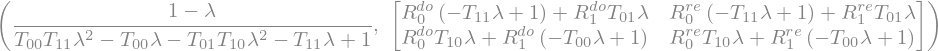

In [18]:
print(sympy.latex(gcd))
print(sympy.latex(temp_mat*R))
gcd, temp_mat*R

#### 3.3.1 considering the short-term reward

1
\left[\begin{matrix}R_0^{do} & R_0^{re}\\R_1^{do} & R_1^{re}\end{matrix}\right]


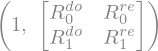

In [19]:
# 只考虑短期的单步收益，令 lamda = 0
# Only consider the short-term single-step income, let lamda = 0
print(sympy.latex(gcd.subs(lamda, 0)))
print(sympy.latex(temp_mat.subs(lamda, 0)*R))
gcd.subs(lamda, 0), temp_mat.subs(lamda, 0)*R

当 $\lambda = 0$ 时，将一步收益记为 $\dot{\mathbf{V}}$，则

When $\lambda = 0$, the one-step reward is denoted as $\dot{\mathbf{V}}$, then

$$
\dot{\mathbf{V}} = \left[\begin{matrix}R_0^{do} & R_0^{re}\\R_1^{do} & R_1^{re}\end{matrix}\right]
$$

### 3.4. $\mathbf{V}$ under the specific norm rule, donor strategy and recipient strategy

针对 norm 编号为 $10$，donor的策略为 $D$，recipient的策略为 $NR$，计算 $\mathbf{V}$

For norm number $10$, donor's strategy is $D$, recipient's strategy is $NR$, calculate $\mathbf{V}$

$$
\begin{equation}
    \begin{aligned}
        \mathbf{V} &= \frac{1 - \lambda}{(1-\lambda T_{00})(1-\lambda T_{11})-\lambda^2T_{01}T_{10}}
\begin{pmatrix}R_0^{do} \left( 1 - T_{11} \lambda\right) + R_1^{do} T_{01} \lambda & R_0^{re} \left( 1 - T_{11} \lambda\right) + R_1^{re} T_{01} \lambda\\R_0^{do} T_{10} \lambda + R_1^{do} \left( 1 - T_{00} \lambda\right) & R_0^{re} T_{10} \lambda + R_1^{re} \left( 1- T_{00} \lambda \right)\end{pmatrix} \\
        &= \frac{1 - \lambda}{(1-\lambda T_{00})(1-\lambda T_{11})-\lambda^2T_{01}T_{10}}
\begin{pmatrix}0 \left( 1 - T_{11} \lambda\right) + 0 T_{01} \lambda & 0 \left( 1 - T_{11} \lambda\right) + 0 T_{01} \lambda\\0 T_{10} \lambda + 0 \left( 1 - T_{00} \lambda\right) & 0 T_{10} \lambda + 0 \left( 1- T_{00} \lambda \right)\end{pmatrix} \\
        &= \frac{1 - \lambda}{(1-\lambda T_{00})(1-\lambda T_{11})-\lambda^2T_{01}T_{10}}
\begin{pmatrix}0 & 0\\0 & 0\end{pmatrix} \\
        &= \begin{pmatrix}0 & 0\\0 & 0\end{pmatrix} \\
        &= \begin{pmatrix} V_0^{do} & V_0^{re} \\ V_1^{do} & V_1^{re} \end{pmatrix} 
    \end{aligned}
\end{equation}
$$


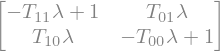

In [20]:
E = sympy.eye(2)
lamda = sympy.Symbol("lamda")
temp_mat = E - lamda * T
temp_mat = temp_mat.inv()
# extract the common factor to simplify temp_mat
gcd = sympy.gcd(temp_mat[0, 0], temp_mat[0, 1])
temp_mat = temp_mat / gcd
temp_mat

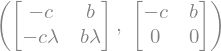

In [33]:
# 带入 T00 = 0, T01 = 1, T10 = 0, T11 = 0，求出 gcd 和 temp_mat * R
import sympy

def value(T:sympy.Matrix, R:sympy.Matrix, input_lamda: float = None):
    """compute the value of the matrix expression with the given T and R

    Args:
        T (sympy.Matrix): _description_
        R (sympy.Matrix): _description_
        short_term (bool, optional): _description_. Defaults to False.

    Returns:
        _type_: _description_
    """

    E = sympy.eye(2)
   
    lamda = sympy.Symbol("lamda")
    
    temp_mat = E - lamda * T
    temp_mat = temp_mat.inv()
    
    # extract the common factor to simplify temp_mat
    gcd = sympy.gcd(temp_mat[0, 0], temp_mat[0, 1])
    temp_mat = temp_mat / gcd
    gcd_value = (gcd * (1 - lamda))
    gcd_value = sympy.simplify(gcd_value)
    temp_value = (temp_mat * R)
    temp_value = sympy.simplify(temp_value)
    if input_lamda is not None:
        return (gcd_value*temp_value).subs(lamda, input_lamda).simplify()
    # return gcd_value, temp_value
    return (gcd_value*temp_value).simplify()

sympy.init_printing()
# the left is the value of the matrix expression, the right is the value of the matrix expression when lamda = 0
value(*trs['NDISC', 'NR', 10]), value(*trs['NDISC', 'NR', 10], 0)

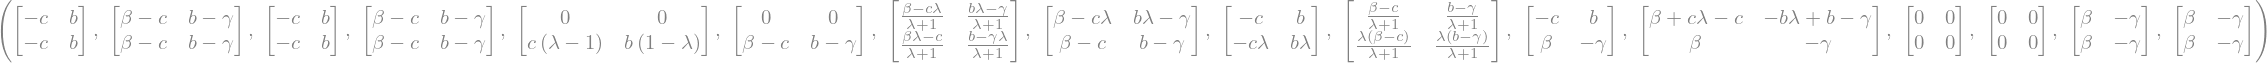

In [22]:
# return the value of the matrix expression with the given T and R in the specific norm
# use map to process all T and R in trs.get_tr_by_norm(10)
res = map(lambda tr: value(tr[0], tr[1]), trs.get_tr_by_norm(10))
res_ls = []
for r in res:
    res_ls.append(r)
tuple(res_ls)

又 $ \mathbf{V} = \begin{pmatrix} V_0^{do} & V_0^{re} \\ V_1^{do} & V_1^{re} \end{pmatrix} $，根据状态分布 $\mathbf{P} = (p_{s=0}, p_{s=1})$，有 $\mathbf{P} \mathbf{V} =  ( p_{s=0} V_0^{do} + p_{s=1} V_1^{do},\quad p_{s=0} V_0^{re} + p_{s=1} V_1^{re} )$ 表示策略价值，第一个元素表示捐赠者的策略价值，第二个元素表示接收者的策略价值。

And $ \mathbf{V} = \begin{pmatrix} V_0^{do} & V_0^{re} \\ V_1^{do} & V_1^{re} \end{pmatrix} $, according to the state distribution $\mathbf{P} = (p_{s=0}, p_{s=1})$, there is $\mathbf{P} \mathbf{V} =  ( p_{s=0} V_0^{do} + p_{s=1} V_1^{do},\quad p_{s=0} V_0^{re} + p_{s=1} V_1^{re} )$ represents the strategy value, the first element represents the strategy value of the donor, and the second element represents the strategy value of the recipient.

<!-- TODO: strategy and stable distribution all uses $\pi$ -->

由马尔可夫过程计算出平稳分布 $ \mathbf{\pi} = (\pi_0, \pi_1) $，其中 $\pi_0$ 表示坏声誉的平稳分布，$\pi_1$ 表示好声誉的平稳分布。则经过连续博弈收敛至平稳分布的策略价值为 $ \mathbf{\pi} \mathbf{V} = (\pi_0 V_0^{do} + \pi_1 V_1^{do}, \pi_0 V_0^{re} + \pi_1 V_1^{re}) $。

#### calculate the stable distribution of the state

$$
\begin{equation}
    \begin{aligned}
    \begin{cases}
        \mathbf{\pi} \mathbf{P} = \mathbf{\pi} \\
        \pi_0 + \pi_1 = 1
    \end{cases}
    \end{aligned}
\end{equation}
$$

<!-- TODO: 平稳分布在所有值表可能的 -->

In [32]:
def get_stable(T:sympy.Matrix, P0:sympy.Matrix, input_lambda: float = None) -> sympy.Matrix:
    """ calculate the stable distribution of states

    Args:
        T (sympy.Matrix): one step transition matrix of states
        P0 (sympy.Matrix): initial distribution of states, example: P0 = sympy.Matrix([[p_, p]])

    Returns:
        sympy.Matrix: stable distribution of states
    """
    # if input_lambda == 0, only consider short-term reward
    if input_lambda == 0:
        # return sympy.Matrix([[solution[pi0], solution[pi1]]])
        return P0

    pi0 = sympy.Symbol(r"pi0")
    pi1 = sympy.Symbol(r"pi1")
    pi = sympy.Matrix([[pi0, pi1]])
    eq1 = sympy.Eq(pi * T, pi)
    eq2 = sympy.Eq(pi0 + pi1, 1)
    solution = sympy.solve([eq1, eq2], pi0, pi1)
    try:
        # for value table
        # 0 1
        # 0 0
        # or
        # 0 1
        # 1 1
        # or
        # 0 1
        # 1 0
        # there must be a solution
        res_pi = sympy.Matrix([[solution[pi0], solution[pi1]]])
    except:
        # but for value table
        # 0 1
        # 0 1
        # there is only one solution pi0 = 1 - pi1, so the stable distribution doesn't exist and the state is always the same as the initial state
        solution[pi0] = P0[0, 0]
        solution[pi1] = P0[0, 1]
        res_pi = sympy.Matrix([[solution[pi0], solution[pi1]]])

    return res_pi
t, r = trs['NDISC', 'NR', 10]
# right is the reward of shot-term
get_stable(t, P0), get_stable(t, P0, input_lambda=0)

In [34]:
def value_stable(T:sympy.Matrix, R:sympy.Matrix, P0:sympy.Matrix, input_lambda:float = None):

    E = sympy.eye(2)
   
    lamda = sympy.Symbol("lamda")
    
    temp_mat = E - lamda * T
    temp_mat = temp_mat.inv()
    
    # extract the common factor to simplify temp_mat
    gcd = sympy.gcd(temp_mat[0, 0], temp_mat[0, 1])
    temp_mat = temp_mat / gcd
    gcd_value = (gcd * (1 - lamda))
    gcd_value = sympy.simplify(gcd_value)
    temp_value = (temp_mat * R)
    temp_value = sympy.simplify(temp_value)
    # return gcd_value, temp_value
    # v2_2 is 2x2 matrix v
    v2_2 = (gcd_value*temp_value).simplify()
    v1_2 = get_stable(T, P0, input_lambda=input_lambda) * v2_2
    # v1_2 is 1x2 matrix v
    if input_lambda is None:
        v1_2 = v1_2.simplify()
    else:
        v1_2 = v1_2.subs(lamda, input_lambda).simplify()
    return v1_2

value_stable(*trs['NDISC', 'AR', 10], P0), value_stable(*trs['NDISC', 'AR', 10], P0, input_lambda=0)
value_stable(*trs['NDISC', 'NR', 10], P0), value_stable(*trs['NDISC', 'NR', 10], P0, input_lambda=0)

In [25]:
import random
# random test
ouput_file = open("output.txt", "w")
ouput_file.write("do_stg_name,re_stg_name,norm_no,res\n")
times = 50
for i in range(times):
    random_do_stg_name = random.choice(do_stg_names)
    random_re_stg_name = random.choice(re_stg_names)
    random_norm_no = random.choice(range(16))
    res = value_stable(*trs[random_do_stg_name, random_re_stg_name, random_norm_no], P0)
    ouput_file.write(f"{random_do_stg_name},{random_re_stg_name},{random_norm_no},{str(res[0, 0])}:{str(res[0, 1])}\n")
ouput_file.close()

In [37]:
# generate the payoff matrix config file under specific social norm
# we define the file format in the ./payoffMatrix/README.md
# like this:
# Donor Recipient:b c beta gamma lambda p,NR,SR,AR,UR
# C,-c:b,beta-c:b-gamma,-c:b,beta-c:b-gamma
# DISC,0:0,p*(beta-c):p*(b-gamma),(beta-c)/2:(b-gamma)/2,beta-c:b-gamma
# NDISC,-c:b,(beta-c)/2:(b-gamma)/2,(1-p)*(-c)+p*beta:(1-p)*b+p*(-gamma),beta:-gamma
# D,0:0,0:0,beta:-gamma,beta:-gamma
import os

def generate_payoff_matrix_x(norm_no: int,  do_stg_names: list[str], re_stg_names: list[str], P0: sympy.Matrix, file_path: str = '', input_lambda:float = None):
    def set2strls(s:set)->list[str]:
        ls = []
        while len(s) > 0:
            ls.append(str(s.pop()))
        return ls

    # record the vars in the payoff matrix
    vars = set()
    values = list()
    latex_values = list()
    for d in do_stg_names:
        values_lines = []
        latex_values_lines = []
        for r in re_stg_names:
            value_mat = value_stable(*trs[d, r, norm_no], P0, input_lambda=input_lambda)
            vars.update(value_mat.free_symbols)

            do_value, re_value = value_mat[0, 0], value_mat[0, 1]
            values_lines.append(f"{str(do_value)}:{str(re_value)}")
            latex_values_lines.append(f"${sympy.latex(do_value)}, \quad {sympy.latex(re_value)}$")
        values.append(values_lines)
        latex_values.append(latex_values_lines)

    DELIM = ","
    file_lines = []
    header = "Donor Recipient" + ":" + " ".join(set2strls(vars)) + DELIM
    header += DELIM.join(re_stg_names)
    file_lines.append(header)
    for i in range(len(do_stg_names)):
        line = do_stg_names[i] + DELIM + DELIM.join(values[i])
        file_lines.append(line)

    MD_DELIM = "|"
    MD_LAYOUT = "---"
    md_lines = []
    md_header = MD_DELIM + "Donor Recipient" + MD_DELIM + MD_DELIM.join(re_stg_names) + MD_DELIM
    md_secend_header = MD_DELIM + (MD_LAYOUT + MD_DELIM) * (len(re_stg_names) + 1)
    md_lines.append(md_header)
    md_lines.append(md_secend_header)
    for i in range(len(do_stg_names)):
        line = MD_DELIM + do_stg_names[i] + MD_DELIM + MD_DELIM.join(latex_values[i]) + MD_DELIM
        md_lines.append(line)

    if not file_path == '':
        file_dir = os.path.dirname(file_path)
        if not os.path.exists(file_dir):
            os.makedirs(file_dir)

        file = open(file_path, "w")
        for line in file_lines:
            file.write(line + "\n")
        file.close()
        return md_lines
    else:
        return md_lines



# note: config_name and the parameter of generate_payoff_matrix_x should be edit meanwhile
payoff_matrix_config_name = "payoffMatrix_shortterm"
norm_no2md_lines = {}
for norm_no in range(16):
    print(f"norm{norm_no}")
    norm_no2md_lines[norm_no] = generate_payoff_matrix_x(norm_no,  do_stg_names, re_stg_names, P0, f"../payoffMatrix/{payoff_matrix_config_name}/PayoffMatrix{norm_no}.csv", input_lambda=0)

norm0
norm1
norm2
norm3
norm4
norm5
norm6
norm7
norm8
norm9
norm10
norm11
norm12
norm13
norm14
norm15


In [38]:
import os
if not os.path.exists(f"./{payoff_matrix_config_name}"):
    os.mkdir(f"./{payoff_matrix_config_name}")

file = open(f"./{payoff_matrix_config_name}/payoffMatrix.md", "w")
for i in range(16):
    print(f"norm{i}")
    file.write(f"norm{i}\n\n")
    for line in norm_no2md_lines[i]:
        # print(line)
        file.write(line + "\n")
    file.write("\n")
file.close()

norm0
norm1
norm2
norm3
norm4
norm5
norm6
norm7
norm8
norm9
norm10
norm11
norm12
norm13
norm14
norm15


### the payoff matrix under all norms derived by automatic symbolic calculation(two-player game)

- payoffMatrix_longterm_no_norm_error

[payoffMatrix_table](./payoffMatrix_longterm_no_norm_error/payoffMatrix.md)

norm0

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|
|NDISC|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm1

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- \frac{c}{2}, \quad \frac{b}{2}$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm2

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$0, \quad 0$|$0, \quad 0$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\beta - \frac{c}{2}, \quad \frac{b}{2} - \gamma$|
|NDISC|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm3

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- \frac{c}{2}, \quad \frac{b}{2}$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\beta - \frac{c}{2}, \quad \frac{b}{2} - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm4

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$0, \quad 0$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta, \quad - \gamma$|
|NDISC|$- \frac{c}{2}, \quad \frac{b}{2}$|$\beta - c, \quad b - \gamma$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\beta - c, \quad b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm5

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c, \quad b$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta, \quad - \gamma$|
|NDISC|$0, \quad 0$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\beta - c, \quad b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm6

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$0, \quad 0$|$- c, \quad b$|$\beta - \frac{c}{2}, \quad \frac{b}{2} - \gamma$|
|NDISC|$- \frac{c}{2}, \quad \frac{b}{2}$|$\beta - c, \quad b - \gamma$|$\beta, \quad - \gamma$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm7

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c, \quad b$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$- c, \quad b$|$\beta - \frac{c}{2}, \quad \frac{b}{2} - \gamma$|
|NDISC|$0, \quad 0$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta, \quad - \gamma$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm8

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$0, \quad 0$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$\beta, \quad - \gamma$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$- c, \quad b$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$- c, \quad b$|$\beta - \frac{c}{2}, \quad \frac{b}{2} - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm9

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- \frac{c}{2}, \quad \frac{b}{2}$|$\beta - c, \quad b - \gamma$|$\beta, \quad - \gamma$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$0, \quad 0$|$- c, \quad b$|$\beta - \frac{c}{2}, \quad \frac{b}{2} - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm10

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$0, \quad 0$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\beta - c, \quad b - \gamma$|
|NDISC|$- c, \quad b$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta, \quad - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm11

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- \frac{c}{2}, \quad \frac{b}{2}$|$\beta - c, \quad b - \gamma$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\beta - c, \quad b - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$0, \quad 0$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta, \quad - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm12

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$- \frac{c}{2}, \quad \frac{b}{2}$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\beta - \frac{c}{2}, \quad \frac{b}{2} - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm13

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$0, \quad 0$|$0, \quad 0$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\beta - \frac{c}{2}, \quad \frac{b}{2} - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm14

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|NDISC|$- \frac{c}{2}, \quad \frac{b}{2}$|$\frac{\beta}{2} - \frac{c}{2}, \quad \frac{b}{2} - \frac{\gamma}{2}$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm15

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|NDISC|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|



- payoffMatrix_shortterm

[payoffMatrix_table](./payoffMatrix_shortterm/payoffMatrix.md)

norm0

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm1

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm2

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm3

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm4

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm5

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm6

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm7

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm8

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm9

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm10

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm11

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm12

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm13

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm14

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

norm15

|Donor Recipient|NR|SR|AR|UR|
|---|---|---|---|---|
|C|$- c, \quad b$|$\beta - c, \quad b - \gamma$|$- c, \quad b$|$\beta - c, \quad b - \gamma$|
|DISC|$- c p, \quad b p$|$p \left(\beta - c\right), \quad p \left(b - \gamma\right)$|$- \beta p + \beta - c p, \quad b p + \gamma \left(p - 1\right)$|$\beta - c p, \quad b p - \gamma$|
|NDISC|$c \left(p - 1\right), \quad b \left(1 - p\right)$|$- \left(\beta - c\right) \left(p - 1\right), \quad - \left(b - \gamma\right) \left(p - 1\right)$|$\beta p + c \left(p - 1\right), \quad - b p + b - \gamma p$|$\beta + c p - c, \quad - b p + b - \gamma$|
|D|$0, \quad 0$|$0, \quad 0$|$\beta, \quad - \gamma$|$\beta, \quad - \gamma$|

## 4. Meta Game Analysis 

<!-- TODO: 为什么能使用元博弈 -->

以上推导的 $\mathbf{V}(\mathbf{X}) $ 中的 $\mathbf{X} $ 表示的是联合策略，其中的 p 取值为 0 或 1。

The $\mathbf{X}$ in $\mathbf{V}(\mathbf{X}) $ derived above represents the joint strategy, and the value of p is 0 or 1.

现在，将博弈从两人交互推广到一个群体中，以元博弈作为分析工具，将博弈参与者的策略视为Meta Action，而博弈参与双方的Meta Action 形成联合元动作，联合元动作决定了状态转移。

Now, the game is generalized from two-person interaction to a group, and the meta game is used as an analysis tool. The strategy of the game participants is regarded as Meta Action, and the Meta Action of both sides of the game participants forms a joint meta action, which determines the state transition.

描述 Markov Reward Process (MRP) 的四元组 $ <\mathcal{S}, \mathbf{T}, \mathbf{R}, \lambda> $ 中的 $\mathcal{S}$ 需要被重新定义，而 $\mathbf{T}$ 则需要重新计算。

The $\mathcal{S}$ in the four-tuple $ <\mathcal{S}, \mathbf{T}, \mathbf{R}, \lambda> $ describing Markov Reward Process (MRP) needs to be redefined, and $\mathbf{T}$ needs to be recalculated.

### 4.1 Meta Action

for Donor:

$$
\begin{equation}
    \begin{aligned}
    C^i = (X_{0c}^i=1, X_{1c}^i=1) \\
    DISC^i = (X_{0d}^i=1, X_{1c}^i=1) \\
    NDISC^i = (X_{0c}^i=1, X_{1d}^i=1) \\
    D^i = (X_{0d}^i=1, X_{1d}^i=1) \\
    \end{aligned}
\end{equation}
$$

for Recipient:

$$
\begin{equation}
    \begin{aligned}
    NR^i = (X_{0c}^i=1, X_{1c}^i=1) \\
    SR^i = (X_{0d}^i=1, X_{1c}^i=1) \\
    AR^i = (X_{0c}^i=1, X_{1d}^i=1) \\
    UR^i = (X_{0d}^i=1, X_{1d}^i=1) \\
    \end{aligned}
\end{equation}
$$

联合动作的可能取值有：

The possible values of the joint action are:

$$
\begin{equation}
    \begin{aligned}
        C^i\text{, all other Recipient's meta action are} \quad NR^{-i} \\
        C^i\text{, all other Recipient's meta action are} \quad SR^{-i} \\
        C^i\text{, all other Recipient's meta action are} \quad AR^{-i} \\
        C^i\text{, all other Recipient's meta action are} \quad UR^{-i} \\
        DISC^i\text{, all other Recipient's meta action are} \quad NR^{-i} \\
        DISC^i\text{, all other Recipient's meta action are} \quad SR^{-i} \\
        DISC^i\text{, all other Recipient's meta action are} \quad AR^{-i} \\
        DISC^i\text{, all other Recipient's meta action are} \quad UR^{-i} \\
        NDISC^i\text{, all other Recipient's meta action are} \quad NR^{-i} \\
        NDISC^i\text{, all other Recipient's meta action are} \quad SR^{-i} \\
        NDISC^i\text{, all other Recipient's meta action are} \quad AR^{-i} \\
        NDISC^i\text{, all other Recipient's meta action are} \quad UR^{-i} \\
        D^i\text{, all other Recipient's meta action are} \quad NR^{-i} \\
        D^i\text{, all other Recipient's meta action are} \quad SR^{-i} \\
        D^i\text{, all other Recipient's meta action are} \quad AR^{-i} \\
        D^i\text{, all other Recipient's meta action are} \quad UR^{-i} \\
    \end{aligned}
\end{equation}
$$